# OpenCV의 이미지와 영상 처리

## OpenCV 이미지 처리 이해 및 타 패키지와 비교

In [1]:
!mkdir ./data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-04-16 11:05:54--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2022-04-16 11:05:55 (10.6 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



### PIL 패키지를 이용해서 이미지 불러오기

image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


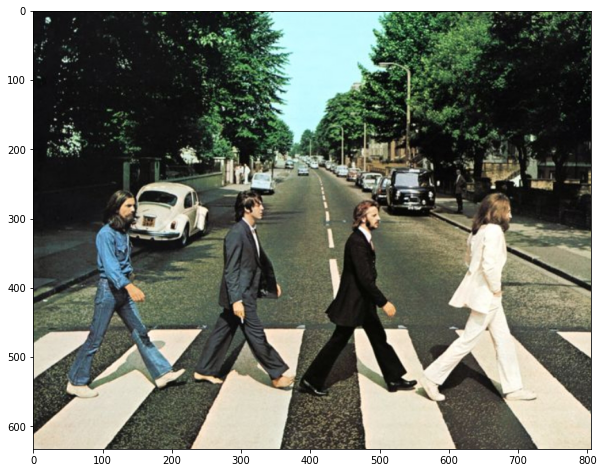

In [2]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

from PIL import Image

# PIL은 oepn()으로 이미지 파일을 읽어서 ImageFile객체를 생성함
pil_image = Image.open('/content/data/beatles01.jpg')
print('image type:', type(pil_image))

plt.figure(figsize = (10, 10))
plt.imshow(pil_image)
# plt.show()

### skimage로 이미지 로드 하기

- skimage는 imread()를 이용하여 RGB 원본 이미지를 RGB 형태의 넘파이 배열로 반환함

sk_image type: <class 'numpy.ndarray'>  sk_image shape: (633, 806, 3)


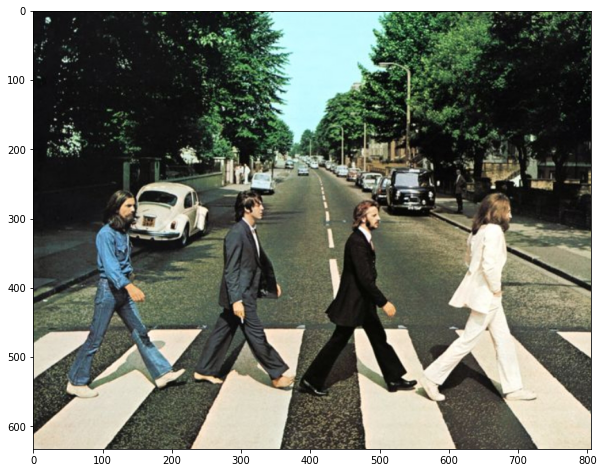

In [3]:
from skimage import io

# skimage는 imread()를 이용하여 image를 numpy 배열로 반환함
sk_image = io.imread('/content/data/beatles01.jpg')
print('sk_image type:', type(sk_image), ' sk_image shape:', sk_image.shape)

plt.figure(figsize = (10, 10))
plt.imshow(sk_image)
# plt.show()

### OpenCV로 이미지 로드하기

- OpenCV는 imread()를 이용하여 원본 RGB 이미지를 BGR 형태의 넘파이 배열로 반환함
- OpenCV의 imwrite()를 이용한다면 BGR 형태의 이미지 배열을 파일에 기록할 때 다시 RGB형태로 변환하므로 사용자는 RGB -> BGR -> RGB 변환에 신경쓰지 않아도 됨

cv_image type: <class 'numpy.ndarray'>  cv_image shape: (633, 806, 3)


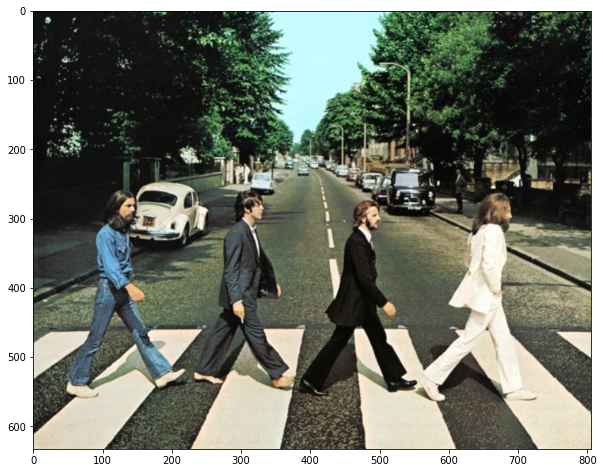

In [4]:
import cv2

cv2_image = cv2.imread('/content/data/beatles01.jpg')
cv2.imwrite('/content/data/beatles02_cv.jpg', cv2_image)
print('cv_image type:', type(cv2_image), ' cv_image shape:', cv2_image.shape)

plt.figure(figsize = (10, 10))
img = plt.imread('/content/data/beatles02_cv.jpg')
plt.imshow(img)
# plt.show()

### OpenCV의 imread()로 반환된 BGR 이미지 넘파이 배열을 그대로 시각화 하기

- OpenCV의 imread()는 RGB를 BGR로 변환하므로 원하지 않는 이미지가 출력됨

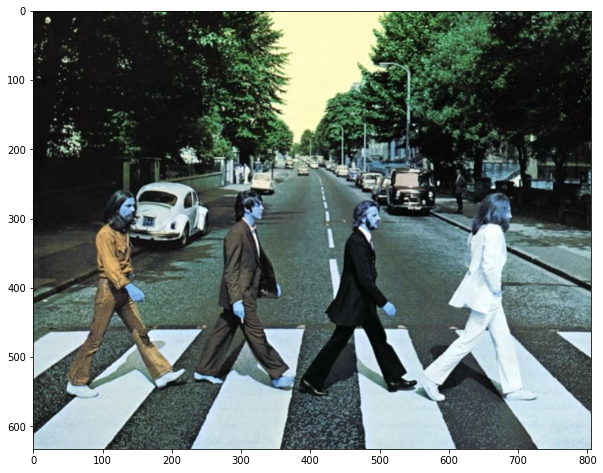

In [5]:
cv2_image = cv2.imread('/content/data/beatles01.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(cv2_image)
plt.show()

## OpenCV 영상처리

- OpenCV는 간편하게 비디오 영상처리를 할 수 있는 API를 제공
- VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
- VideoWriter 객체는 VideoCapture로 읽어들인 Frame을 동영상으로 Write하는 기능 제공

In [6]:
!mkdir ./data
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

mkdir: cannot create directory ‘./data’: File exists
--2022-04-16 11:17:37--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2022-04-16 11:17:38--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2022-04-16 11:17:38--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuse

In [7]:
# 코랩 버전에서 위의 샘플은 John wick이지만 실제 Video 처리는 강의와 동일하게 Night and Day로 수행

import cv2

video_input_path = '/content/data/Night_Day_Chase.mp4'
# linux에서 video output의 확장자는 반드시 avi 로 설정해야 함
video_output_path = '/content/data/Night_Day_Chase_out.mp4'

cap = cv2.VideoCapture(video_input_path)
# 코덱은 *'XVID'로 설정
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) # (200, 400)
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

총 Frame 갯수: 1383 FPS: 28 Frame 크기: (1216, 516)


In [8]:
import time

green_color = (0, 255, 0)
red_color = (0, 0, 255)

start = time.time()
index=0
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame :', index, '처리 완료')
    
    cv2.rectangle(img_frame, (300, 100, 800, 400), color = green_color, thickness = 2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)
    
    vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time()-start,4))
vid_writer.release()
cap.release()

frame : 1 처리 완료
frame : 2 처리 완료
frame : 3 처리 완료
frame : 4 처리 완료
frame : 5 처리 완료
frame : 6 처리 완료
frame : 7 처리 완료
frame : 8 처리 완료
frame : 9 처리 완료
frame : 10 처리 완료
frame : 11 처리 완료
frame : 12 처리 완료
frame : 13 처리 완료
frame : 14 처리 완료
frame : 15 처리 완료
frame : 16 처리 완료
frame : 17 처리 완료
frame : 18 처리 완료
frame : 19 처리 완료
frame : 20 처리 완료
frame : 21 처리 완료
frame : 22 처리 완료
frame : 23 처리 완료
frame : 24 처리 완료
frame : 25 처리 완료
frame : 26 처리 완료
frame : 27 처리 완료
frame : 28 처리 완료
frame : 29 처리 완료
frame : 30 처리 완료
frame : 31 처리 완료
frame : 32 처리 완료
frame : 33 처리 완료
frame : 34 처리 완료
frame : 35 처리 완료
frame : 36 처리 완료
frame : 37 처리 완료
frame : 38 처리 완료
frame : 39 처리 완료
frame : 40 처리 완료
frame : 41 처리 완료
frame : 42 처리 완료
frame : 43 처리 완료
frame : 44 처리 완료
frame : 45 처리 완료
frame : 46 처리 완료
frame : 47 처리 완료
frame : 48 처리 완료
frame : 49 처리 완료
frame : 50 처리 완료
frame : 51 처리 완료
frame : 52 처리 완료
frame : 53 처리 완료
frame : 54 처리 완료
frame : 55 처리 완료
frame : 56 처리 완료
frame : 57 처리 완료
frame : 58 처리 완료
frame : 59 처리 완료
frame 